In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [2]:
import pandas as pd

# Load dataset
data = pd.read_csv('/content/WineQT.csv')  # Update the path to your dataset


In [3]:
# Inspect dataset
print(data.head())
print(data.info())
print(data.describe())

# Handle missing values if any
data = data.fillna(data.mean())  # Example: fill missing values with the mean


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [6]:
features = data[['density', 'fixed acidity']]  # Remove the extra space before 'fixed acidity'
target = data['quality']  # Assuming 'quality' is the target variable

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_predictions = rf_model.predict(X_test)
print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions)}")
print(classification_report(y_test, rf_predictions))


Random Forest Classifier:
Accuracy: 0.6069868995633187
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.64      0.67      0.65        96
           6       0.63      0.61      0.62        99
           7       0.52      0.58      0.55        26
           8       0.00      0.00      0.00         2

    accuracy                           0.61       229
   macro avg       0.30      0.31      0.30       229
weighted avg       0.60      0.61      0.60       229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
from sklearn.svm import SVC

# Initialize and train the model
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)

# Predict and evaluate
svc_predictions = svc_model.predict(X_test)
print("Support Vector Classifier:")
print(f"Accuracy: {accuracy_score(y_test, svc_predictions)}")
print(classification_report(y_test, svc_predictions))


Support Vector Classifier:
Accuracy: 0.4847161572052402
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.47      0.91      0.62        96
           6       0.53      0.24      0.33        99
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00         2

    accuracy                           0.48       229
   macro avg       0.20      0.23      0.19       229
weighted avg       0.43      0.48      0.40       229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


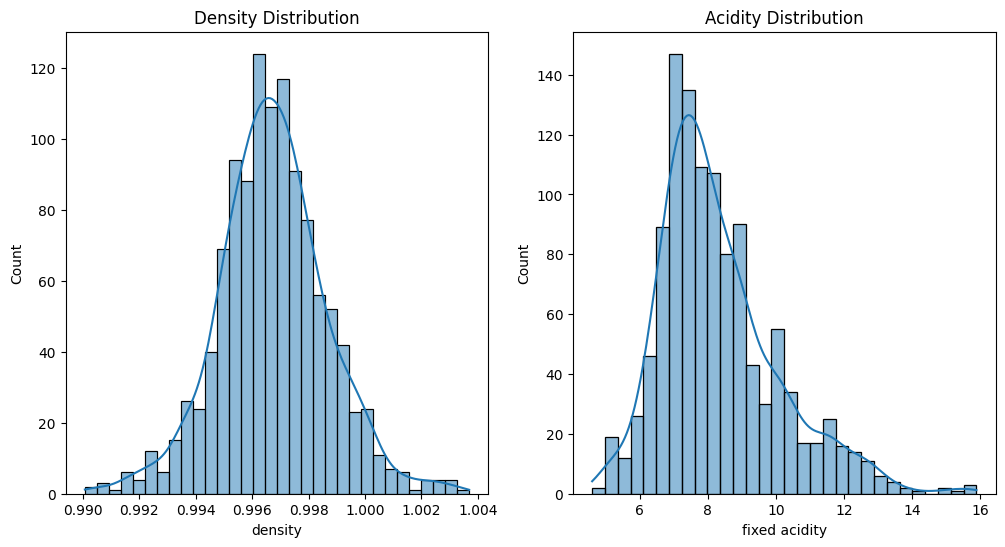

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot density and acidity distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['density'], kde=True)
plt.title('Density Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data['fixed acidity'], kde=True)
plt.title('Acidity Distribution')

plt.show()


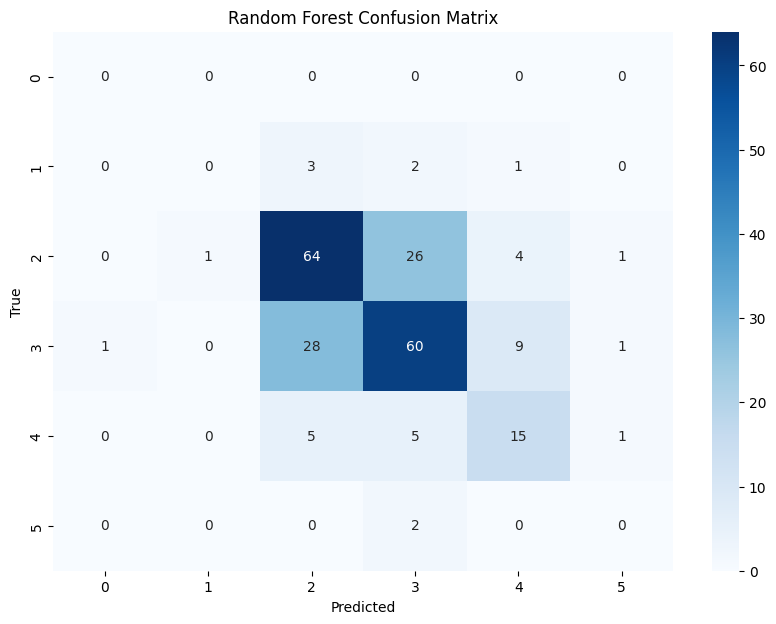

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix for Random Forest
plt.figure(figsize=(10, 7))
conf_matrix_rf = confusion_matrix(y_test, rf_predictions)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Similar plots can be created for SGD and SVC
